# Dataset And Preprocessing

In [ ]:
pip install  --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown 1Ce9EfcikQohU-WIp1Mb1YyIRrZQPby5C --no-cookies
!unzip CNN_dataset.zip

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

dir_path = '/content/CNN_dataset/'

train_split = 0.75
val_split = 0.1
test_split = 0.15

images = []
labels = []

class_names = ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

## Preprocessing - Resizing 64 * 64

In [ ]:
for i, class_name in enumerate(class_names):
  class_path = os.path.join(dir_path, class_name)
  for img_name in os.listdir(class_path):
      img_path = os.path.join(class_path, img_name)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (64, 64))
      images.append(img)
      labels.append(i)

In [ ]:
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1)
labels = np.array(labels, dtype=np.int32)

## Split Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=test_split, stratify=labels, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_split/(train_split-val_split),
    stratify=y_train, random_state=42)

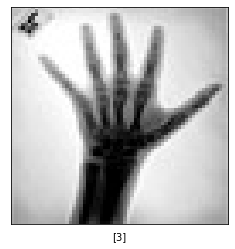

In [ ]:
import matplotlib.pyplot as plt

plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[24]])
plt.imshow(x_train[24],cmap=plt.cm.binary)

In [ ]:
x_train /= 255.
x_val /= 255.
x_test /= 255.

# Training the model

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 ### Resize the images as they are not same in size 

In [ ]:
x_train = x_train.reshape(-1,64, 64,1)
x_test = x_test.reshape(-1,64, 64, 1)
x_train.shape

(35961, 64, 64, 1)

In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
420/420 [==============================] - 21s 22ms/step - loss: 0.1015 - accuracy: 0.9710 - val_loss: 0.0348 - val_accuracy: 0.9949
Epoch 2/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.0090 - val_accuracy: 0.9980
Epoch 3/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0182 - val_accuracy: 0.9962
Epoch 4/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.0124 - val_accuracy: 0.9956
Epoch 5/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0046 - val_accuracy: 0.9988
Epoch 6/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0054 - val_accuracy: 0.9987
Epoch 7/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0050 - val_accuracy: 0.998

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9973333477973938


In [ ]:
predictions = model.predict(x_test)
predictions[100]

235/235 [==============================] - 1s 2ms/step


array([9.9999583e-01, 1.2822815e-09, 2.7968408e-06, 7.5472474e-07,
       6.1601838e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
x_test = x_test.reshape(-1, 64, 64)
x_test.shape

(7500, 64, 64)

In [ ]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_test[20]])
plt.imshow(x_test[20],cmap=plt.cm.binary)

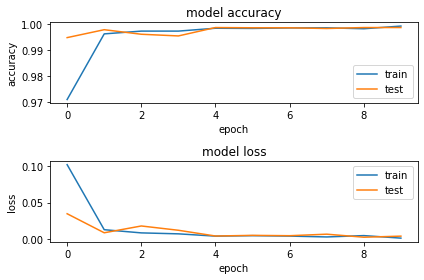

In [ ]:
import os
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

# Finetune using EfficientNet

Here we are Using **EfficientNetB0**

It has only 5.3 million parameters, with 1000 outputs classes (for ImageNet) in the final fully-connected layer, . This gives around 77.1% top-1 accuracy on the ImageNet dataset. Still, this beats ResNet50 which has 76.0% top-1 accuracy but with 26 million parameters.

In [42]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
data_dir = '/content/CNN_dataset/'

In [43]:
# Set the batch size and image size
batch_size = 32
img_height = 224
img_width = 224

# Create data generators for training, validation, and testing
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 40000 images belonging to 5 classes.
Found 10000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.


In [44]:
from tensorflow.keras.applications import EfficientNetB0

# Build the model architecture
model = Sequential()

model.add(EfficientNetB0(include_top=False, input_shape=(img_height, img_width, 3)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 [==============================] - 0s 0us/step


In [45]:
epochs = 5

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/5
1250/1250 [==============================] - 750s 565ms/step - loss: 0.2024 - accuracy: 0.9835 - val_loss: 2216.5901 - val_accuracy: 0.2022
Epoch 2/5
1250/1250 [==============================] - 712s 569ms/step - loss: 0.8231 - accuracy: 0.8377 - val_loss: 3.8442 - val_accuracy: 0.1997
Epoch 3/5
1250/1250 [==============================] - 700s 560ms/step - loss: 0.3523 - accuracy: 0.8844 - val_loss: 6.2126 - val_accuracy: 0.2952
Epoch 4/5
1250/1250 [==============================] - 664s 531ms/step - loss: 0.3253 - accuracy: 0.8891 - val_loss: 0.5677 - val_accuracy: 0.7625
Epoch 5/5
1250/1250 [==============================] - 717s 574ms/step - loss: 0.3159 - accuracy: 0.9169 - val_loss: 4.7266 - val_accuracy: 0.2002


In [ ]:
saved_model_path = "medical_image_classifier_effnet_finetuned.h5"
model.save(saved_model_path)

In [ ]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
